In [1]:
from fastai import *
from fastai.vision import *

In [2]:
path='/home/link-lap-24/fastai/'

In [5]:
path

'/home/link-lap-24/fastai/'

In [7]:
from fastai.vision.transform import get_transforms

In [28]:
tmfs=get_transforms(do_flip=False,max_rotate=False,flip_vert=False,max_warp=False,
    p_affine=False,
    p_lighting=False,
    max_zoom=False)

In [33]:
from re import split
from fastai.vision.data import ImageList

data= (ImageList.from_folder(path)
       .split_by_folder(train='ball',valid='neg')
       .label_from_folder()
       .transform(tmfs,size=244)
       .databunch()
       .normalize(imagenet_stats)
)

/home/link-lap-24/.local/lib/python3.8/site-packages/fastai/data_block.py:541: UserWarning: You are labelling your items with CategoryList.
Your valid set contained the following unknown labels, the corresponding items have been discarded.
neg
  if getattr(ds, 'warn', False): warn(ds.warn)


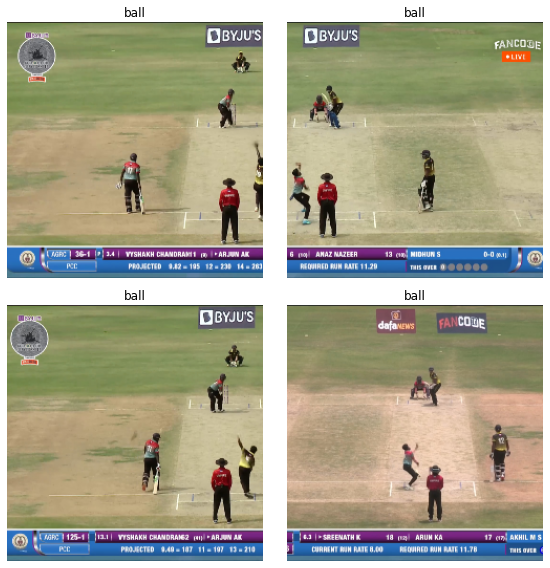

In [36]:
data.show_batch(rows=2)

# 2nd type

In [46]:
# experiment
path2=untar_data(URLs.PLANET_TINY)

In [47]:
path2

PosixPath('/home/link-lap-24/.fastai/data/planet_tiny')

In [48]:
df=pd.read_csv(path2/'labels.csv')

In [49]:
df.head()

,image_name,tags
0,train_31112,clear primary
1,train_4300,partly_cloudy primary water
2,train_39539,clear primary water
3,train_12498,agriculture clear primary road
4,train_9320,clear primary


In [51]:
tmfs2=get_transforms(flip_vert=True)

In [56]:
data2=(ImageList.from_csv(path2,'labels.csv',folder='train',suffix='.jpg')
       .split_by_rand_pct()#deafult taking 80,20 ration spliting data
       .label_from_df(cols='tags',label_delim=' ')
       .transform(tmfs2,size=128)
       .databunch()
       .normalize(imagenet_stats)      
      )

/home/link-lap-24/.local/lib/python3.8/site-packages/fastai/core.py:302: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(a, dtype=dtype, **kwargs)


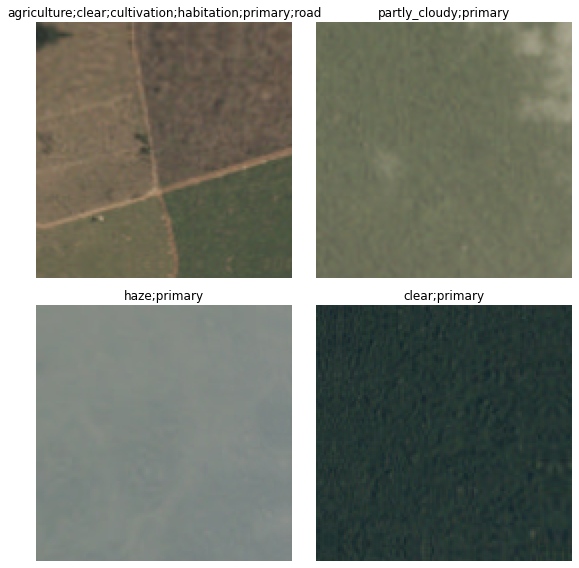

In [58]:
data2.show_batch(rows=2)

# 3 type

In [60]:
path3=untar_data(URLs.CAMVID_TINY)

In [76]:
path3

array(['Animal', 'Archway', 'Bicyclist', 'Bridge', 'Building', 'Car', 'CartLuggagePram', 'Child', 'Column_Pole',
       'Fence', 'LaneMkgsDriv', 'LaneMkgsNonDriv', 'Misc_Text', 'MotorcycleScooter', 'OtherMoving', 'ParkingBlock',
       'Pedestrian', 'Road', 'RoadShoulder', 'Sidewalk', 'SignSymbol', 'Sky', 'SUVPickupTruck', 'TrafficCone',
       'TrafficLight', 'Train', 'Tree', 'Truck_Bus', 'Tunnel', 'VegetationMisc', 'Void', 'Wall'], dtype='<U17')

In [80]:
path3=np.loadtxt(path3/'codes.txt',dtype=str)
path3

TypeError: ufunc 'true_divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [78]:
path3[2]

'Bicyclist'

In [79]:
path_img=path3/'images'

TypeError: ufunc 'true_divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''